In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fit_circle_by_least_square import fit_circle_by_least_square0, fit_circle_by_least_square, fit_circle_by_least_square_filter

# 最小二乘法根据圆的边缘坐标求圆心和半径

# difine edge points

In [2]:
np.random.seed(0)
# 设置参数
radius = 5  # 圆的半径
angle = np.linspace(0, 2 * np.pi, 100)  # 生成100个角度值，从0到2π

# 根据圆的参数方程计算圆上的点
x = radius * np.cos(angle) + np.random.normal(0, 0.02, 100)
y = radius * np.sin(angle) + np.random.normal(0, 0.02, 100)

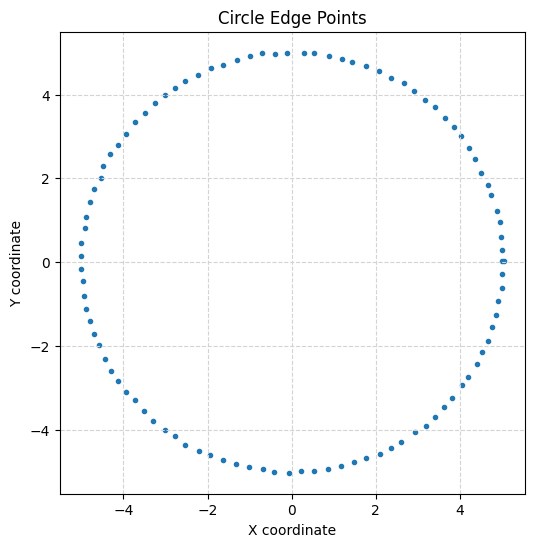

In [3]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='.')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# test

In [4]:
compare_result = []

In [5]:
center_x, center_y, radius, err_avg, err_var, err_std, err_abs, radii_err = fit_circle_by_least_square0(np.stack([x, y], axis=1))
center_x, center_y, radius, err_avg, err_var, err_std, err_abs

(0.005017266266637793,
 -0.00037922058986336637,
 5.008548690203552,
 -2.6456289989642558e-05,
 0.0002650145332055846,
 0.016279266973840825,
 array([0.02185894, 0.00718304, 0.00279399, 0.03428761, 0.01704388,
        0.01943474, 0.00151614, 0.02206483, 0.00428534, 0.01040745,
        0.01220135, 0.02178044, 0.01275164, 0.01811753, 0.00997686,
        0.00580082, 0.02099262, 0.01524986, 0.0034865 , 0.00122293,
        0.01733501, 0.02763254, 0.00015813, 0.01604252, 0.01995599,
        0.01050412, 0.01651901, 0.02968342, 0.00018967, 0.0067562 ,
        0.0221098 , 0.00076946, 0.01011135, 0.01479248, 0.01215895,
        0.00366823, 0.01232357, 0.02458485, 0.00649801, 0.01307529,
        0.00368844, 0.02484058, 0.02796522, 0.03438471, 0.02233426,
        0.01012183, 0.01690465, 0.01530106, 0.02619765, 0.00044619,
        0.01439764, 0.01443316, 0.00880103, 0.02294456, 0.00274594,
        0.00745749, 0.01430663, 0.00029449, 0.01824507, 0.00630991,
        0.01189129, 0.02529543, 0.00734172

In [6]:
center_x, center_y, radius, err_avg, err_var, err_std, err_abs, radii_err = fit_circle_by_least_square(np.stack([x, y], axis=1))
center_x, center_y, radius, err_avg, err_var, err_std, err_abs

(0.0050172662666379386,
 -0.0003792205898636016,
 5.008548690203551,
 -2.6456289988798788e-05,
 0.0002650145332055838,
 0.0162792669738408,
 array([0.02185894, 0.00718304, 0.00279399, 0.03428761, 0.01704388,
        0.01943474, 0.00151614, 0.02206483, 0.00428534, 0.01040745,
        0.01220135, 0.02178044, 0.01275164, 0.01811753, 0.00997686,
        0.00580082, 0.02099262, 0.01524986, 0.0034865 , 0.00122293,
        0.01733501, 0.02763254, 0.00015813, 0.01604252, 0.01995599,
        0.01050412, 0.01651901, 0.02968342, 0.00018967, 0.0067562 ,
        0.0221098 , 0.00076946, 0.01011135, 0.01479248, 0.01215895,
        0.00366823, 0.01232357, 0.02458485, 0.00649801, 0.01307529,
        0.00368844, 0.02484058, 0.02796522, 0.03438471, 0.02233426,
        0.01012183, 0.01690465, 0.01530106, 0.02619765, 0.00044619,
        0.01439764, 0.01443316, 0.00880103, 0.02294456, 0.00274594,
        0.00745749, 0.01430663, 0.00029449, 0.01824507, 0.00630991,
        0.01189129, 0.02529543, 0.00734172, 

In [7]:
compare_result.append([center_x, center_y, radius, err_avg, err_var, err_std])

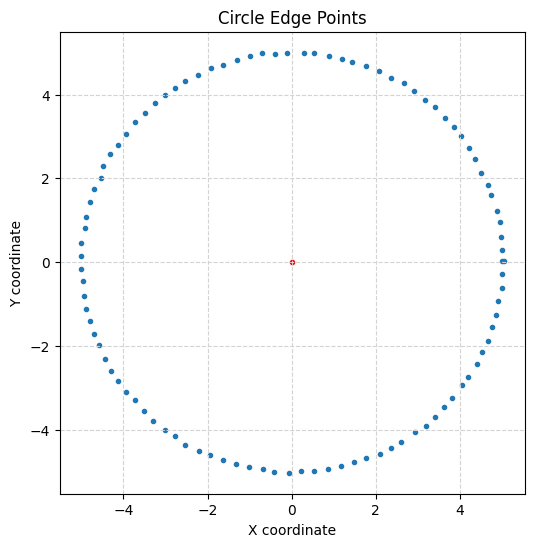

In [8]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='.')  # 使用散点图表示圆上的点
plt.scatter(center_x, center_x, marker='.', c='r')  # 使用散点图表示圆心
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# test1

In [9]:
x_t = x[::2]
y_t = y[::2]
x_t[:5]

array([5.03528105, 4.97934882, 4.87709467, 4.66084143, 4.36718251])

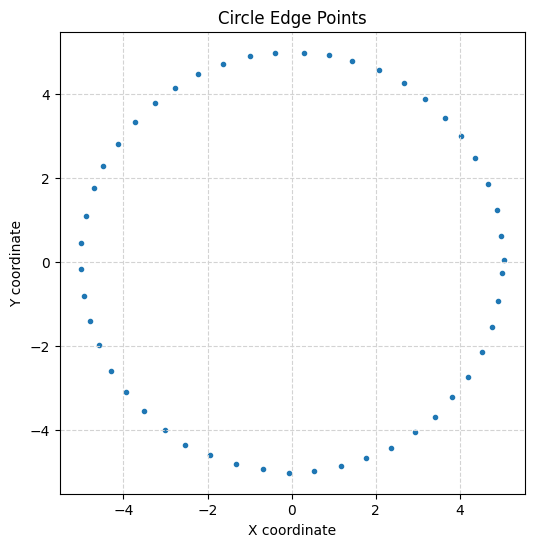

In [10]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.scatter(x_t, y_t, marker='.')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

In [13]:
center_x, center_y, radius, err_avg, err_var, err_std, err_abs, radii_err = fit_circle_by_least_square0(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err_avg, err_var, err_std, err_abs

(0.0009938742709094985,
 -0.0007450326263211604,
 5.0082571542614325,
 -2.2471932948757713e-05,
 0.00022508993293075846,
 0.015002997464865428,
 array([0.02617653, 0.00712359, 0.02132567, 0.00568183, 0.00825854,
        0.01593689, 0.00928553, 0.00686005, 0.02372427, 0.0057805 ,
        0.01554003, 0.00120238, 0.01907316, 0.01618388, 0.0003401 ,
        0.02279224, 0.01129703, 0.01380217, 0.01437438, 0.00403447,
        0.00652281, 0.02484242, 0.01898423, 0.01334648, 0.02251455,
        0.0106562 , 0.00506259, 0.00641783, 0.01785317, 0.01490059,
        0.00879287, 0.01014749, 0.00913284, 0.02525843, 0.02339166,
        0.03034092, 0.02902206, 0.01157367, 0.00497095, 0.00182261,
        0.01094837, 0.00636178, 0.00226435, 0.02274332, 0.01633122,
        0.00223247, 0.00537577, 0.00591223, 0.01206431, 0.00931335]))

In [14]:
center_x, center_y, radius, err_avg, err_var, err_std, err_abs, radii_err = fit_circle_by_least_square(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err_avg, err_var, err_std, err_abs

(0.0009938742709093844,
 -0.000745032626321561,
 5.0082571542614325,
 -2.247193294873995e-05,
 0.0002250899329307588,
 0.01500299746486544,
 array([0.02617653, 0.00712359, 0.02132567, 0.00568183, 0.00825854,
        0.01593689, 0.00928553, 0.00686005, 0.02372427, 0.0057805 ,
        0.01554003, 0.00120238, 0.01907316, 0.01618388, 0.0003401 ,
        0.02279224, 0.01129703, 0.01380217, 0.01437438, 0.00403447,
        0.00652281, 0.02484242, 0.01898423, 0.01334648, 0.02251455,
        0.0106562 , 0.00506259, 0.00641783, 0.01785317, 0.01490059,
        0.00879287, 0.01014749, 0.00913284, 0.02525843, 0.02339166,
        0.03034092, 0.02902206, 0.01157367, 0.00497095, 0.00182261,
        0.01094837, 0.00636178, 0.00226435, 0.02274332, 0.01633122,
        0.00223247, 0.00537577, 0.00591223, 0.01206431, 0.00931335]))

In [15]:
compare_result.append([center_x, center_y, radius, err_avg, err_var, err_std])

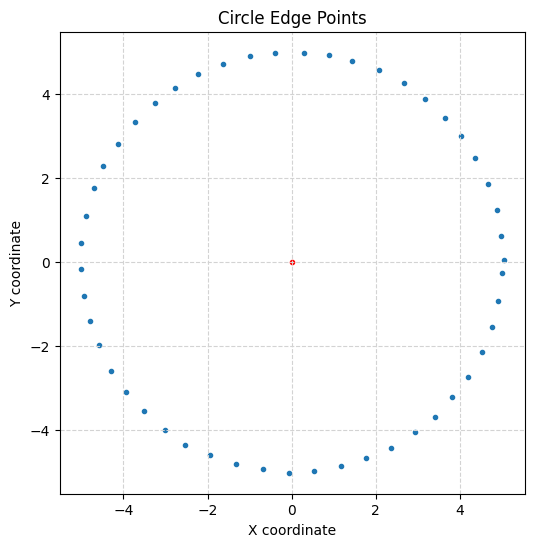

In [16]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.scatter(x_t, y_t, marker='.')  # 使用散点图表示圆上的点
plt.scatter(center_x, center_x, marker='.', c='r')  # 使用散点图表示圆心
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# test2

In [17]:
x_t = x[25:]
y_t = y[25:]
x_t[:5]

array([-0.10841713, -0.39533461, -0.71531787, -0.99337776, -1.30298189])

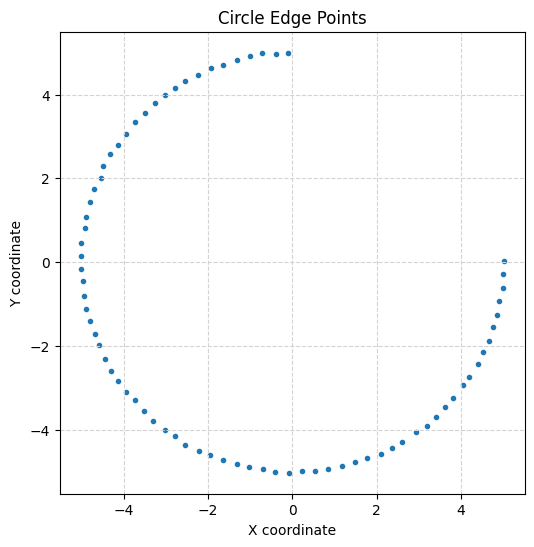

In [18]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.scatter(x_t, y_t, marker='.')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

In [19]:
center_x, center_y, radius, err_avg, err_var, err_std, err_abs, radii_err = fit_circle_by_least_square0(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err_avg, err_var, err_std, err_abs

(0.0026562355759528733,
 -0.0010535891959639152,
 5.007383955523738,
 -2.617545510825418e-05,
 0.0002621404227231617,
 0.016190751147589222,
 array([0.00871821, 0.01487085, 0.03117861, 0.00116583, 0.00555739,
        0.02108271, 0.00164787, 0.00940292, 0.01534321, 0.0117479 ,
        0.00394342, 0.01218474, 0.02459052, 0.00635227, 0.01335862,
        0.00410038, 0.02432301, 0.0273358 , 0.03510423, 0.02152272,
        0.00921517, 0.01590946, 0.016356  , 0.02507104, 0.00072883,
        0.01318114, 0.01567973, 0.00752716, 0.02165745, 0.00403659,
        0.00874157, 0.01557667, 0.00094645, 0.01703901, 0.00514756,
        0.01078263, 0.02634776, 0.00832059, 0.01493464, 0.01076252,
        0.01636298, 0.026702  , 0.01646012, 0.02215156, 0.01383928,
        0.02932456, 0.0146387 , 0.02822387, 0.0067821 , 0.01216255,
        0.02280636, 0.00535996, 0.00271465, 0.00163818, 0.0091789 ,
        0.01094925, 0.02305344, 0.00617767, 0.01216874, 0.00261391,
        0.03890727, 0.0222616 , 0.01335695,

In [20]:
center_x, center_y, radius, err_avg, err_var, err_std, err_abs, radii_err = fit_circle_by_least_square(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err_avg, err_var, err_std, err_abs

(0.0026562355759526235,
 -0.0010535891959639954,
 5.007383955523738,
 -2.6175455108289707e-05,
 0.0002621404227231622,
 0.016190751147589236,
 array([0.00871821, 0.01487085, 0.03117861, 0.00116583, 0.00555739,
        0.02108271, 0.00164787, 0.00940292, 0.01534321, 0.0117479 ,
        0.00394342, 0.01218474, 0.02459052, 0.00635227, 0.01335862,
        0.00410038, 0.02432301, 0.0273358 , 0.03510423, 0.02152272,
        0.00921517, 0.01590946, 0.016356  , 0.02507104, 0.00072883,
        0.01318114, 0.01567973, 0.00752716, 0.02165745, 0.00403659,
        0.00874157, 0.01557667, 0.00094645, 0.01703901, 0.00514756,
        0.01078263, 0.02634776, 0.00832059, 0.01493464, 0.01076252,
        0.01636298, 0.026702  , 0.01646012, 0.02215156, 0.01383928,
        0.02932456, 0.0146387 , 0.02822387, 0.0067821 , 0.01216255,
        0.02280636, 0.00535996, 0.00271465, 0.00163818, 0.0091789 ,
        0.01094925, 0.02305344, 0.00617767, 0.01216874, 0.00261391,
        0.03890727, 0.0222616 , 0.01335695

In [21]:
compare_result.append([center_x, center_y, radius, err_avg, err_var, err_std])

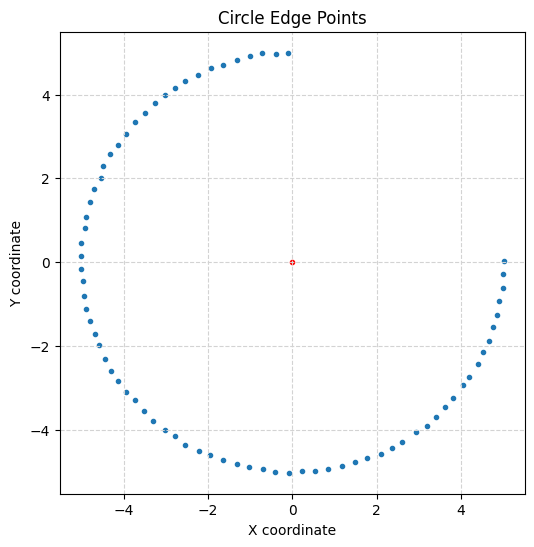

In [22]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.scatter(x_t, y_t, marker='.')  # 使用散点图表示圆上的点
plt.scatter(center_x, center_x, marker='.', c='r')  # 使用散点图表示圆心
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# test3

In [23]:
x_t = x[40::2]
y_t = y[40::2]
x_t[:5]

array([-4.13935397, -4.47830265, -4.70865615, -4.90220484, -5.00963757])

In [24]:
x_t = np.concatenate([x_t[:10], x_t[20:]], axis=0)
y_t = np.concatenate([y_t[:10], y_t[20:]], axis=0)

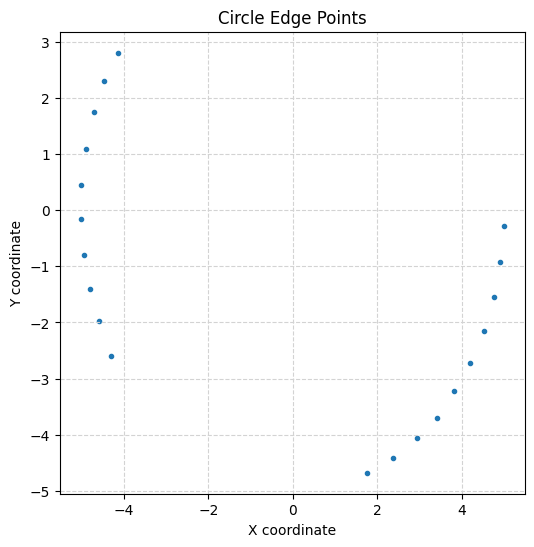

In [25]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.scatter(x_t, y_t, marker='.')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

In [26]:
center_x, center_y, radius, err_avg, err_var, err_std, err_abs, radii_err = fit_circle_by_least_square0(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err_avg, err_var, err_std, err_abs

(-0.005106649360733729,
 0.002719628278910757,
 5.010834291540123,
 -1.4001050792300518e-05,
 0.00014031369483073379,
 0.011845408174931491,
 array([0.01609367, 0.01525606, 0.00948017, 0.00406516, 0.01355244,
        0.00209288, 0.0029784 , 0.01386898, 0.02465064, 0.00888737,
        0.00813215, 0.00972227, 0.00153852, 0.02685189, 0.01201435,
        0.00219355, 0.0009556 , 0.00161566, 0.00800208, 0.00560882]))

In [27]:
center_x, center_y, radius, err_avg, err_var, err_std, err_abs, radii_err = fit_circle_by_least_square(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err_avg, err_var, err_std, err_abs

(-0.0051066493607336335,
 0.002719628278910867,
 5.010834291540124,
 -1.4001050793144288e-05,
 0.00014031369483073276,
 0.011845408174931448,
 array([0.01609367, 0.01525606, 0.00948017, 0.00406516, 0.01355244,
        0.00209288, 0.0029784 , 0.01386898, 0.02465064, 0.00888737,
        0.00813215, 0.00972227, 0.00153852, 0.02685189, 0.01201435,
        0.00219355, 0.0009556 , 0.00161566, 0.00800208, 0.00560882]))

In [28]:
compare_result.append([center_x, center_y, radius, err_avg, err_var, err_std])

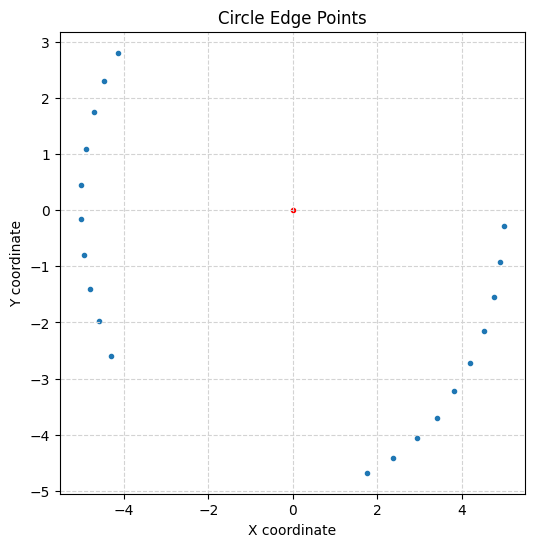

In [29]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.scatter(x_t, y_t, marker='.')  # 使用散点图表示圆上的点
plt.scatter(center_x, center_x, marker='.', c='r')  # 使用散点图表示圆心
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# test4

In [30]:
np.random.seed(0)
index = np.random.choice(100, 50)
index

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87, 70, 88, 88, 12, 58, 65, 39,
       87, 46, 88, 81, 37, 25, 77, 72,  9, 20, 80, 69, 79, 47, 64, 82, 99,
       88, 49, 29, 19, 19, 14, 39, 32, 65,  9, 57, 32, 31, 74, 23, 35])

In [31]:
x_t = x[index]
y_t = y[index]
x_t[:5]

array([-4.70865615, -4.92164464, -3.02449991, -2.21107742, -2.21107742])

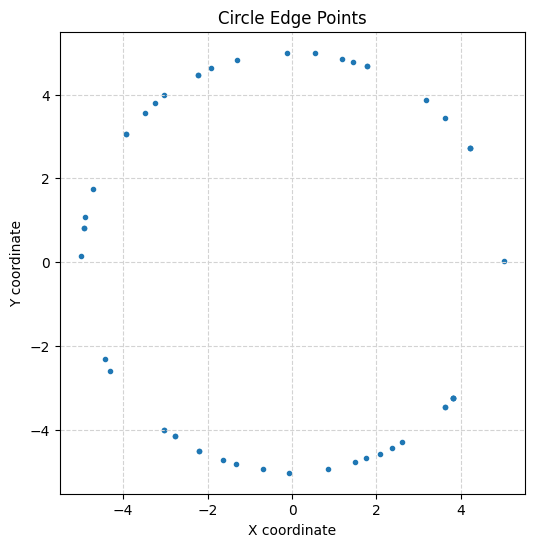

In [32]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.scatter(x_t, y_t, marker='.')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

In [33]:
center_x, center_y, radius, err_avg, err_var, err_std, err_abs, radii_err = fit_circle_by_least_square0(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err_avg, err_var, err_std, err_abs

(0.0022448530568001967,
 -0.0012209940118912057,
 5.003983916420162,
 -2.0084416189121157e-05,
 0.0002010037877704473,
 0.014177580462492437,
 array([0.02459591, 0.01333455, 0.01378089, 0.01952862, 0.01952862,
        0.01775595, 0.01563896, 0.02158901, 0.00892548, 0.00977492,
        0.02619504, 0.01331998, 0.01331998, 0.00559432, 0.02000025,
        0.01333112, 0.01018013, 0.00977492, 0.01894395, 0.01331998,
        0.02647238, 0.02135865, 0.00515993, 0.00601988, 0.02504673,
        0.01775595, 0.0111696 , 0.00756111, 0.01073224, 0.00581664,
        0.01333455, 0.01378089, 0.00962448, 0.00188906, 0.01331998,
        0.00226504, 0.00210311, 0.00755148, 0.00755148, 0.00300834,
        0.01018013, 0.00603766, 0.01333112, 0.01775595, 0.00201138,
        0.00603766, 0.0050442 , 0.01538916, 0.02173983, 0.00722834]))

In [34]:
center_x, center_y, radius, err_avg, err_var, err_std, err_abs, radii_err = fit_circle_by_least_square(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err_avg, err_var, err_std, err_abs

(0.0022448530568000813,
 -0.001220994011890897,
 5.003983916420161,
 -2.0084416188161926e-05,
 0.00020100378777044818,
 0.01417758046249247,
 array([0.02459591, 0.01333455, 0.01378089, 0.01952862, 0.01952862,
        0.01775595, 0.01563896, 0.02158901, 0.00892548, 0.00977492,
        0.02619504, 0.01331998, 0.01331998, 0.00559432, 0.02000025,
        0.01333112, 0.01018013, 0.00977492, 0.01894395, 0.01331998,
        0.02647238, 0.02135865, 0.00515993, 0.00601988, 0.02504673,
        0.01775595, 0.0111696 , 0.00756111, 0.01073224, 0.00581664,
        0.01333455, 0.01378089, 0.00962448, 0.00188906, 0.01331998,
        0.00226504, 0.00210311, 0.00755148, 0.00755148, 0.00300834,
        0.01018013, 0.00603766, 0.01333112, 0.01775595, 0.00201138,
        0.00603766, 0.0050442 , 0.01538916, 0.02173983, 0.00722834]))

In [35]:
compare_result.append([center_x, center_y, radius, err_avg, err_var, err_std])

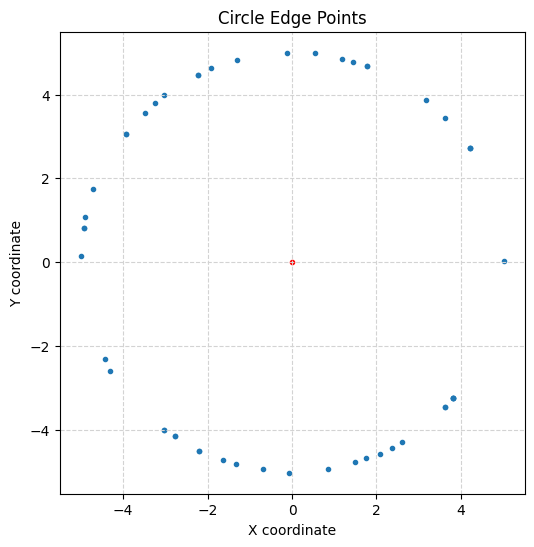

In [36]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.scatter(x_t, y_t, marker='.')  # 使用散点图表示圆上的点
plt.scatter(center_x, center_x, marker='.', c='r')  # 使用散点图表示圆心
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# compare result

In [37]:
import pandas as pd

In [38]:
compare_result

[[0.0050172662666379386,
  -0.0003792205898636016,
  5.008548690203551,
  -2.6456289988798788e-05,
  0.0002650145332055838,
  0.0162792669738408],
 [0.0009938742709093844,
  -0.000745032626321561,
  5.0082571542614325,
  -2.247193294873995e-05,
  0.0002250899329307588,
  0.01500299746486544],
 [0.0026562355759526235,
  -0.0010535891959639954,
  5.007383955523738,
  -2.6175455108289707e-05,
  0.0002621404227231622,
  0.016190751147589236],
 [-0.0051066493607336335,
  0.002719628278910867,
  5.010834291540124,
  -1.4001050793144288e-05,
  0.00014031369483073276,
  0.011845408174931448],
 [0.0022448530568000813,
  -0.001220994011890897,
  5.003983916420161,
  -2.0084416188161926e-05,
  0.00020100378777044818,
  0.01417758046249247]]

In [39]:
pd.DataFrame(compare_result, columns=["center_x", "center_y", "radius", "err_avg", "err_var", "err_std"])

,center_x,center_y,radius,err_avg,err_var,err_std
0,0.005017,-0.000379,5.008549,-0.000026,0.000265,0.016279
1,0.000994,-0.000745,5.008257,-0.000022,0.000225,0.015003
2,0.002656,-0.001054,5.007384,-0.000026,0.000262,0.016191
3,-0.005107,0.002720,5.010834,-0.000014,0.000140,0.011845
4,0.002245,-0.001221,5.003984,-0.000020,0.000201,0.014178
